# Projeto 2
Vamos dar continuidade ao nosso projeto, agora como os dados á foram trabalhados e pré-processados no projeto 1, vamos neste projeto utilizar algoritmos para conseguir um modelo para classificar a posição de um jogador daods os atributos de 

In [1]:
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\rubin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("./project_dataset.pkl")

df.head(10)

,player_positions,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,outlier
142,Meia,0.796296,0.723684,0.6500,0.783784,0.851351,0.701299,0.661538,0.690476,0.709302,...,0.872093,0.831325,0.823529,0.847059,0.470588,0.717949,0.597701,0.809524,0.729412,-1
143,Zagueiro,0.796296,0.802632,0.3125,0.662162,0.689189,0.909091,0.846154,0.559524,0.290698,...,0.848837,0.867470,0.376471,0.600000,0.423529,0.807692,0.896552,0.916667,0.858824,-1
144,Meia,0.796296,0.684211,0.7375,0.824324,0.783784,0.792208,0.800000,0.654762,0.651163,...,0.837209,0.771084,0.800000,0.882353,0.694118,0.794872,0.804598,0.797619,0.752941,-1
145,Lateral,0.796296,0.973684,0.6500,0.783784,0.837838,0.779221,0.769231,0.880952,0.627907,...,0.779070,0.819277,0.776471,0.776471,0.552941,0.769231,0.735632,0.761905,0.752941,-1
147,Atacante,0.796296,0.776316,0.8875,0.621622,0.770270,0.194805,0.846154,0.547619,0.906977,...,0.686047,0.168675,0.882353,0.670588,0.800000,0.794872,0.137931,0.190476,0.164706,-1
148,Zagueiro,0.796296,0.750000,0.5500,0.635135,0.689189,0.922078,0.846154,0.440476,0.476744,...,0.848837,0.879518,0.552941,0.670588,0.317647,0.756410,0.885057,0.916667,0.847059,-1
149,Ala,0.796296,0.960526,0.5250,0.743243,0.837838,0.779221,0.661538,0.869048,0.604651,...,0.755814,0.795181,0.788235,0.823529,0.329412,0.782051,0.781609,0.809524,0.764706,-1
150,Meia Atacante,0.796296,0.618421,0.7750,0.837838,0.864865,0.467532,0.492308,0.797619,0.744186,...,0.476744,0.566265,0.835294,0.870588,0.647059,0.820513,0.494253,0.476190,0.400000,-1
153,Zagueiro,0.796296,0.671053,0.3000,0.648649,0.648649,0.909091,0.830769,0.523810,0.209302,...,0.802326,0.879518,0.364706,0.658824,0.364706,0.705128,0.885057,0.892857,0.858824,-1
155,Zagueiro,0.796296,0.657895,0.4000,0.513514,0.527027,0.922078,0.846154,0.428571,0.313953,...,0.895349,0.891566,0.164706,0.411765,0.341176,0.730769,0.919540,0.892857,0.882353,-1


In [3]:
X = df.drop(columns=['player_positions'])
y = df['player_positions']

In [6]:
# Bloco 2: Aplicar clustering para entendimento dos dados (versão otimizada)

from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Usar uma amostra dos dados para clustering (ex: 10%)
sample_fraction = 0.001
df_sample = df.sample(frac=sample_fraction, random_state=42)

# Separar as features (X_sample) do alvo (y_sample)
X_sample = df_sample.drop(columns=['player_positions'])
y_sample = df_sample['player_positions']

# Aplicar MiniBatchKMeans clustering
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, max_iter=100)
clusters = kmeans.fit_predict(X_sample)


# Adicionar os clusters ao DataFrame
df_sample['cluster'] = clusters

# Visualizar os clusters
sns.pairplot(df_sample, hue='cluster', vars=X_sample.columns)
plt.show()


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: 

In [11]:
from sklearn.model_selection import train_test_split

# Vamos utilizar 70% treino 15% validação e 15% teste 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [18]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
from sklearn.model_selection import GridSearchCV

ip = '127.0.0.1'
port = '8080'

def init_mlflow(ip, port, experiment_name):
    mlflow.set_tracking_uri(f"http://{ip}:{port}")
    mlflow.set_experiment(experiment_name)

In [33]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score , average='weighted')
}

In [34]:
def params_grid_search(model, params, X_train, y_train, scoring):
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=5, refit='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [35]:
def log_model(model, model_name, X_train, y_train, X_val, y_val):

    print(f'Training {model}...')
    
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, average='weighted')
        rec = recall_score(y_val, y_pred, average='weighted')

        mlflow.log_params(model.get_params())
        mlflow.log_metric('accuracy', acc)
        mlflow.log_metric('precision', prec)
        mlflow.log_metric('recall', rec)

        mlflow.set_tag('model', model_name)

        signature = infer_signature(X_train, model.predict(X_train))
        
        mlflow.sklearn.log_model(
            sk_model=model, 
            artifact_path=model_name, 
            signature=signature, 
            input_example=X_train, 
            registered_model_name= model_name
        )

Training DecisionTreeClassifier(max_depth=10)...


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys

Test Accuracy for Decision Tree: 0.6956834902505531
Classification report for Decision Tree:
                  precision    recall  f1-score   support

             Ala       0.00      0.00      0.00       307
        Atacante       0.86      0.89      0.88      3275
         Lateral       0.75      0.86      0.80      3461
            Meia       0.65      0.71      0.68      2820
     Meia Aberto       0.52      0.64      0.57      2555
   Meia Atacante       0.50      0.42      0.46      1296
           Ponta       0.37      0.08      0.13       976
Segundo Atacante       0.38      0.02      0.04       154
         Volante       0.58      0.62      0.60      1872
        Zagueiro       0.87      0.81      0.83      2721

        accuracy                           0.70     19437
       macro avg       0.55      0.50      0.50     19437
    weighted avg       0.67      0.70      0.68     19437



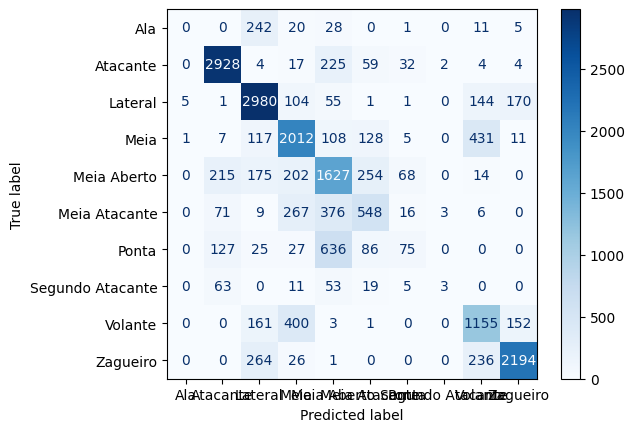

In [36]:
# Bloco 5.1: Treinar e avaliar Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

init_mlflow(ip, port, 'First: DecisionTreeClassifier')

# Treinar Decision Tree

decision_tree_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier()
best_decision_tree = params_grid_search(decision_tree, decision_tree_params, X_train, y_train, scores)
log_model(best_decision_tree, 'DecisionTree', X_train, y_train, X_val, y_val)

# Avaliar no conjunto de teste
y_test_pred_dt = best_decision_tree.predict(X_test)

print(f'Test Accuracy for Decision Tree: {best_decision_tree.score(X_test, y_test)}')
print(f'Classification report for Decision Tree:\n{classification_report(y_test, y_test_pred_dt)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_decision_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()



In [37]:
# Bloco 5.2: Treinar e avaliar Random Forest

from sklearn.ensemble import RandomForestClassifier

# Treinar Random Forest

random_forest_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}
random_forest = RandomForestClassifier()
best_random_forest = params_grid_search(random_forest, random_forest_params, X_train, y_train, scores)
log_model(best_random_forest, 'RandomForest', X_train, y_train, X_val, y_val)

# Avaliar no conjunto de teste
y_test_pred_rf = best_random_forest.predict(X_test)
print(f'Classification report for Random Forest:\n{classification_report(y_test, y_test_pred_rf)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_random_forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\caiop\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

KeyboardInterrupt: 

Best params for KNN: {'n_neighbors': 7}
Validation Accuracy for KNN: 0.7386293476023873
Classification report for KNN:
                  precision    recall  f1-score   support

             Ala       0.13      0.05      0.07       307
        Atacante       0.85      0.93      0.89      3275
         Lateral       0.78      0.88      0.83      3461
            Meia       0.66      0.82      0.73      2820
     Meia Aberto       0.59      0.61      0.60      2555
   Meia Atacante       0.63      0.46      0.53      1296
           Ponta       0.45      0.20      0.28       976
Segundo Atacante       0.30      0.04      0.07       154
         Volante       0.71      0.62      0.66      1872
        Zagueiro       0.89      0.86      0.87      2721

        accuracy                           0.73     19437
       macro avg       0.60      0.55      0.55     19437
    weighted avg       0.72      0.73      0.72     19437



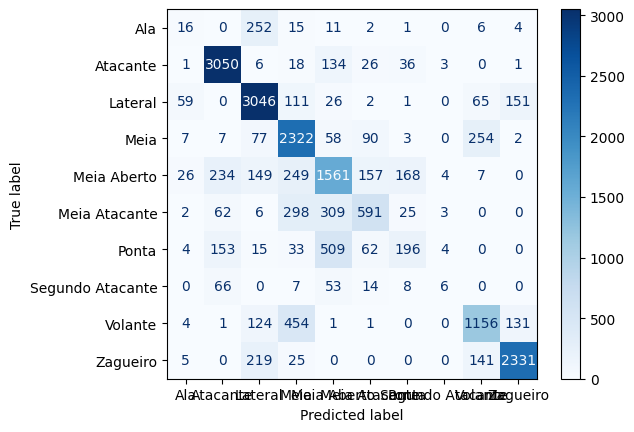

In [10]:
# Bloco 5.3: Treinar e avaliar K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

# Treinar KNN
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn = KNeighborsClassifier()
best_knn = params_grid_search(knn, knn_params, X_train, y_train, scores)
log_model(best_knn, 'KNN', X_train, y_train, X_val, y_val)

# Avaliar no conjunto de teste
y_test_pred_knn = best_knn.predict(X_test)
print(f'Classification report for KNN:\n{classification_report(y_test, y_test_pred_knn)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [15]:
!pip install auto-sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_proces

In [14]:
# Bloco 6: Utilizar auto-sklearn para automação da seleção de modelos e hiperparâmetros

import autosklearn.classification
from sklearn.metrics import accuracy_score

# Utilizar auto-sklearn para classificação
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3600, per_run_time_limit=300)

# Treinar o auto-sklearn
automl.fit(X_train, y_train)

# Fazer previsões e avaliar no conjunto de validação
y_val_pred = automl.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy with auto-sklearn: {val_accuracy}')

# Fazer previsões e avaliar no conjunto de teste
y_test_pred = automl.predict(X_test)
print(f'Classification report with auto-sklearn:\n{classification_report(y_test, y_test_pred)}')

# Exibir matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=automl.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


ModuleNotFoundError: No module named 'autosklearn'